# SMART FAQ MODEL

## Based on Bayesian Next Token Predictor

Rather than just matching questions with answers, we will be tokenizing each word of question and answer. We will collecting all FAQs in one single text file for easier processing.
So asking a question would be like getting a natural response like chatGPT, however we use the basics of bayesian probabilities and precomputed n-grams to generate answer for asked question. This will make the model lightweight, easily deployable and easy to update and scale

## Submission by Sonit Patil (Team Leader) - 1 Member only

### Please refer the bayesian_next_token_predictor.ipynb for the next token predictor logic 

-----------------------------------------------------------------------------------------------------------------------------------------------------

### 1. Processing JSON into text file

In [1]:

{
  "admissions": {
    "1": {
      "question": "What is the process for admission into Saras AI Institute?",
      "answer": "The admission process at Saras AI Institute typically involves submitting the online application form along with necessary details, followed by a quick pre-Enrollment assessment to evaluate your candidature based on your personal traits and basic communication skills in English."
        }
              }
}


{'admissions': {'1': {'question': 'What is the process for admission into Saras AI Institute?',
   'answer': 'The admission process at Saras AI Institute typically involves submitting the online application form along with necessary details, followed by a quick pre-Enrollment assessment to evaluate your candidature based on your personal traits and basic communication skills in English.'}}}

---------------------------

The above is the schema of each FAQ in our JSON file. The way we are going to tackle this is ignoring the overall categories like admissions and nmerization 1,2,3 so on. 
Then, we will be Processing JSON to text conversion as
<question> - <answer> |

So in above case it will be converted to:

What is the process for admission into Saras AI Institute? - The admission process at Saras AI Institute typically involves submitting the online application 
form along with necessary details, followed by a quick pre-Enrollment assessment to evaluate your candidature based on your personal traits 
and basic communication skills in English. | <question 2> - <answer 2> |

Each question-answer pair are separated by | which will help to break the response to the best possible length of response

In [2]:
import json

In [3]:
def json_to_text(input_file, output_file):
    try:
        with open(input_file, 'r') as f:
            data = json.load(f)
    except Exception as e:
        print(f"Error loading JSON file: {e}")
        return

    faq_text = []
    for category, faqs in data.items():
        for key, faq in faqs.items():
            question = faq.get('question', '').strip()
            answer = faq.get('answer', '').strip()
            if question and answer:
                faq_text.append(f"{question} - {answer}")

    output_text = ' | '.join(faq_text)

    try:
        with open(output_file, 'w') as f:
            f.write(output_text)
        print("FAQ JSON to Text Parsing and Formatiing Complete!")
    except Exception as e:
        print(f"Error writing to output file: {e}")


In [4]:
input_json_file = 'faqs.json' 
output_text_file = 'faqs.txt'  

json_to_text(input_json_file, output_text_file)

FAQ JSON to Text Parsing and Formatiing Complete!


In [5]:
import re
try:
    with open('faqs.txt', 'r', encoding='utf-8') as file:
        text = file.read().lower()
except UnicodeDecodeError:
    print("Error: Unable to decode file. Please check the file's encoding.")

words = re.findall(r'\b\w+', text)

In [6]:
print(words[0:300])

['what', 'is', 'the', 'process', 'for', 'admission', 'into', 'saras', 'ai', 'institute', 'the', 'admission', 'process', 'at', 'saras', 'ai', 'institute', 'typically', 'involves', 'submitting', 'the', 'online', 'application', 'form', 'along', 'with', 'necessary', 'details', 'followed', 'by', 'a', 'quick', 'pre', 'enrollment', 'assessment', 'to', 'evaluate', 'your', 'candidature', 'based', 'on', 'your', 'personal', 'traits', 'and', 'basic', 'communication', 'skills', 'in', 'english', 'is', 'there', 'an', 'application', 'fee', 'for', 'applying', 'to', 'saras', 'ai', 'institute', 'there', 'is', 'no', 'application', 'fee', 'for', 'applying', 'to', 'any', 'program', 'at', 'saras', 'what', 'is', 'pre', 'enrollment', 'assessment', 'test', 'how', 'do', 'i', 'prepare', 'for', 'it', 'it', 'is', 'a', 'fully', 'online', 'assessment', 'which', 'takes', 'less', 'than', '15', 'minutes', 'it', 'is', 'designed', 'to', 'evaluate', 'your', 'personal', 'traits', 'and', 'basic', 'english', 'communication', 

In [7]:
from collections import Counter

In [8]:
all_word_count = Counter(words)
for i,j in zip(all_word_count.keys(), all_word_count.values()):
    print (i," -",j)

what  - 6
is  - 19
the  - 39
process  - 2
for  - 24
admission  - 4
into  - 3
saras  - 16
ai  - 18
institute  - 15
at  - 10
typically  - 1
involves  - 1
submitting  - 3
online  - 2
application  - 6
form  - 1
along  - 1
with  - 11
necessary  - 1
details  - 2
followed  - 1
by  - 4
a  - 11
quick  - 1
pre  - 2
enrollment  - 3
assessment  - 3
to  - 23
evaluate  - 3
your  - 9
candidature  - 1
based  - 6
on  - 6
personal  - 2
traits  - 2
and  - 23
basic  - 5
communication  - 3
skills  - 6
in  - 13
english  - 3
there  - 5
an  - 5
fee  - 3
applying  - 2
no  - 2
any  - 6
program  - 2
test  - 1
how  - 4
do  - 4
i  - 5
prepare  - 2
it  - 7
fully  - 1
which  - 3
takes  - 1
less  - 1
than  - 1
15  - 1
minutes  - 1
designed  - 4
you  - 13
can  - 13
take  - 1
time  - 2
of  - 12
filling  - 2
out  - 2
does  - 6
not  - 3
require  - 2
specific  - 2
preparation  - 2
are  - 12
requirements  - 1
or  - 4
prerequisites  - 1
programs  - 5
be  - 2
successful  - 1
professional  - 1
need  - 3
possess  - 2
mathemati

In [9]:
print(len(all_word_count))
print(len(words))

335
875


This dataset is small for bayesian probabilities and can cause high inaacuracies. 

Better Way? 

I will be appending SARAS AI website scraped info freom website after the faq in faqs.text so that model is
not only dependent on FAQ -Answer doublets, but also general info about SARAS AI. That way more questions about SARASAI can be answered. So it is like askin a question about 
SARAS AI to a person or a chatbot

In [10]:
!pip install requests beautifulsoup4

In [11]:
import requests
from bs4 import BeautifulSoup

def scrape_additional_info(url):
    try:
        response = requests.get(url)
        response.raise_for_status() 
        soup = BeautifulSoup(response.text, 'html.parser')

 
        info_elements = soup.find_all('p')  
        scraped_info = ' '.join([element.get_text().strip() for element in info_elements if element.get_text().strip()])
        return scraped_info
    except Exception as e:
        print(f"Error scraping the website: {e}")
        return ""

def append_to_faqs_file(output_file, additional_info):
    try:
        with open(output_file, 'a', encoding='utf-8') as f:  
            f.write(f" | {additional_info}\n")  
        print("Additional info appended to FAQs file successfully!")
    except Exception as e:
        print(f"Error writing to output file: {e}")


In [12]:
for i in ['https://www.sarasai.org/', 'https://www.sarasai.org/programs', 'https://www.sarasai.org/admissions', 'https://www.sarasai.org/about-us', 'https://www.sarasai.org/contact-us']:
    url = i 
    output_text_file = 'faqs.txt' 
    
    additional_info = scrape_additional_info(url)
    
    if additional_info:
        append_to_faqs_file(output_text_file, additional_info)


Additional info appended to FAQs file successfully!
Additional info appended to FAQs file successfully!
Additional info appended to FAQs file successfully!
Additional info appended to FAQs file successfully!
Additional info appended to FAQs file successfully!


In [13]:
import re
try:
    with open('faqs.txt', 'r', encoding='utf-8') as file:
        text = file.read().lower()
except UnicodeDecodeError:
    print("Error: Unable to decode file. Please check the file's encoding.")

words = re.findall(r'\b\w+', text)

In [14]:
all_word_count = Counter(words)
for i,j in zip(all_word_count.keys(), all_word_count.values()):
    print (i," -",j)

what  - 6
is  - 47
the  - 126
process  - 2
for  - 53
admission  - 4
into  - 11
saras  - 39
ai  - 162
institute  - 22
at  - 54
typically  - 1
involves  - 1
submitting  - 3
online  - 3
application  - 6
form  - 3
along  - 2
with  - 40
necessary  - 3
details  - 3
followed  - 1
by  - 22
a  - 91
quick  - 1
pre  - 2
enrollment  - 3
assessment  - 11
to  - 94
evaluate  - 5
your  - 29
candidature  - 1
based  - 13
on  - 23
personal  - 10
traits  - 2
and  - 127
basic  - 5
communication  - 5
skills  - 25
in  - 74
english  - 3
there  - 5
an  - 19
fee  - 3
applying  - 4
no  - 4
any  - 6
program  - 8
test  - 1
how  - 5
do  - 11
i  - 5
prepare  - 6
it  - 16
fully  - 2
which  - 9
takes  - 1
less  - 1
than  - 2
15  - 2
minutes  - 1
designed  - 7
you  - 39
can  - 21
take  - 2
time  - 4
of  - 76
filling  - 2
out  - 4
does  - 6
not  - 6
require  - 2
specific  - 5
preparation  - 2
are  - 25
requirements  - 1
or  - 5
prerequisites  - 1
programs  - 8
be  - 14
successful  - 2
professional  - 2
need  - 3
possess

In [15]:
print(len(all_word_count))
print(len(words))

836
3892


NOW this is considerably good to calculate bayesian n-grams

### Computing Probabilities

In [16]:
prob_each_word = {key: value / len(words) for key, value in all_word_count.items()}

In [22]:
with open('unique_data.json', 'w') as json_file:
    json.dump(prob_each_word, json_file)

In [17]:
for i,j in zip(prob_each_word.keys(), prob_each_word.values()):
    print (i," -",j)

what  - 0.001541623843782117
is  - 0.012076053442959919
the  - 0.03237410071942446
process  - 0.0005138746145940391
for  - 0.013617677286742035
admission  - 0.0010277492291880781
into  - 0.0028263103802672147
saras  - 0.010020554984583761
ai  - 0.04162384378211716
institute  - 0.005652620760534429
at  - 0.013874614594039054
typically  - 0.00025693730729701953
involves  - 0.00025693730729701953
submitting  - 0.0007708119218910585
online  - 0.0007708119218910585
application  - 0.001541623843782117
form  - 0.0007708119218910585
along  - 0.0005138746145940391
with  - 0.010277492291880781
necessary  - 0.0007708119218910585
details  - 0.0007708119218910585
followed  - 0.00025693730729701953
by  - 0.005652620760534429
a  - 0.023381294964028777
quick  - 0.00025693730729701953
pre  - 0.0005138746145940391
enrollment  - 0.0007708119218910585
assessment  - 0.0028263103802672147
to  - 0.024152106885919837
evaluate  - 0.0012846865364850976
your  - 0.007451181911613566
candidature  - 0.0002569373072

In [18]:
unique_words, unique_words_prob = list(prob_each_word.keys()), list(prob_each_word.values())

In [19]:
from math import comb
def count_contiguous_combinations(n, r):
    if r > n or r <= 0:
        return 0
    return n - r + 1

In [20]:
conditional_probs = []

In [21]:

for n in range(2, 7):  # n-grams from 2 to 6
    ngram_prob = {}
    total_ngrams = count_contiguous_combinations(len(words), n)

    # Precompute n-grams
    #ngrams = [unique_words[i-1] + "|" + "".join(unique_words[i-n: i-1: 1]) for i in range(n , len(unique_words) + 1)]
    
    # Use Counter to count occurrences
    ngram_counts = Counter()
    for i in range(n-1, len(words), 1): #Iterating throughout text file to find repeated occurences
        #cond = unique_words[j] + "|" + "".join(unique_words[j-n+1: j: 1])
        last_word = words[i]
        preceding_words = ",".join(words[i - n + 1:i])  # Join with commas
        condition = f"{last_word}|{preceding_words}"
        ngram_counts[condition] += 1

    for condition, n_gram_count in ngram_counts.items():
        prob = n_gram_count / total_ngrams if total_ngrams > 0 else 0

        ngram_prob[condition] = prob

    conditional_probs.append(ngram_prob)
        


In [232]:
first_10_items = list(conditional_probs[3].items())[:10]

for key, value in first_10_items:
    print(f"{key}: {value}")

for|what,is,the,process: 0.000257201646090535
admission|is,the,process,for: 0.000257201646090535
into|the,process,for,admission: 0.000257201646090535
saras|process,for,admission,into: 0.000257201646090535
ai|for,admission,into,saras: 0.000257201646090535
institute|admission,into,saras,ai: 0.000257201646090535
the|into,saras,ai,institute: 0.000257201646090535
admission|saras,ai,institute,the: 0.000257201646090535
process|ai,institute,the,admission: 0.000257201646090535
at|institute,the,admission,process: 0.000257201646090535


In [233]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [234]:
probability_array = []

In [235]:
import time

def sentence_completion(z, inp):
    t1 = time.time()
    the_counter = 0
    repeater = 2
    while(z):
        list_inp = inp.split(" ")

        test_condition = "|"
        overflow_string = []
        overflow_string_conditions = []
        if(len(list_inp)>=0):
            n = 5 if (len(list_inp)>5) else len(list_inp)
            while(n!=0):
                s = list_inp[len(list_inp)-n :len(list_inp)]
                overflow_string.append(s)
                n-=1
            for j in overflow_string:
                    test_condition = "|"
                    for i in range(0, len(j), 1):
                        if(i!=len(list_inp)-1):
                            test_condition = test_condition + j[i].lower() + ","
                        else:
                            test_condition = test_condition + j[i].lower()
                    overflow_string_conditions.append(test_condition if test_condition[-1]!=',' else test_condition.rstrip(','))


        l = len(list_inp)
        cases = dict()
        
        
        if(l>=0):
            if repeater == 0:
                the_counter=0
                repeater=2
            n= 4 if (len(list_inp)>5) else len(list_inp)-1
            for k in overflow_string_conditions:
                temp_keys = list(conditional_probs[n].keys())
                temp_vals = list(conditional_probs[n].values())
        
                for i,j in zip(temp_keys,temp_vals):
                    if i.endswith(k):
                        cases[i] = j
               
                if(not bool(cases)):
                    n-=1
                    cases = dict()
                    if(n<0):
                        max_key = max(prob_each_word, key=prob_each_word.get)
                        the_counter = the_counter + 1 if max_key == "the" else the_counter
                        repeater-=1
                        if the_counter>1:
                            max_key = sorted(prob_each_word, key=prob_each_word.get, reverse=True)[1]
                            max_value = prob_each_word[max_key]
                            probability_array.append(max_value)
                            inp = inp+" "+f"{max_key}"
                        print("\n"+inp+" "+f"{max_key}")
                        break
                    continue
                
                
                    
                max_key = max(cases, key=cases.get).replace(k, "")
                max_value = prob_each_word[max_key]
                probability_array.append(max_value)
                the_counter = the_counter + 1 if max_key == "the" else the_counter
                repeater-=1
                if the_counter>1:
                    max_key = sorted(prob_each_word, key=prob_each_word.get, reverse=True)[1]
                    max_value = prob_each_word[max_key]
                    probability_array.append(max_value)
                    inp = inp+" "+f"{max_key}"
                print("\n"+inp+" "+f"{bcolors.WARNING}{max_key}{bcolors.ENDC}")
                
                inp = inp+" "+f"{max_key}"
                break; 

        z-=1


In [236]:
inp = "fees"
z = 35

sentence_completion(z, inp)


fees for

fees for your

fees for your courses

fees for your courses you

fees for your courses you can

fees for your courses you can find

fees for your courses you can find detailed

fees for your courses you can find detailed information

fees for your courses you can find detailed information and

fees for your courses you can find detailed information and breakdown

fees for your courses you can find detailed information and breakdown of

fees for your courses you can find detailed information and breakdown of the

fees for your courses you can find detailed information and breakdown of the fee

fees for your courses you can find detailed information and breakdown of the fee on

fees for your courses you can find detailed information and breakdown of the fee on programs

fees for your courses you can find detailed information and breakdown of the fee on programs page

fees for your courses you can find detailed information and breakdown of the fee on programs page on

fees for 

In [237]:
import time

def sentence_completion(z, inp):
    t1 = time.time()
    the_counter = 0
    repeater = 2
    while z:
        list_inp = inp.split(" ")

        test_condition = "|"
        overflow_string = []
        overflow_string_conditions = []
        
        if len(list_inp) >= 0:
            n = 5 if len(list_inp) > 5 else len(list_inp)
            while n != 0:
                s = list_inp[len(list_inp) - n : len(list_inp)]
                overflow_string.append(s)
                n -= 1
            for j in overflow_string:
                test_condition = "|"
                for i in range(len(j)):
                    if i != len(list_inp) - 1:
                        test_condition += j[i].lower() + ","
                    else:
                        test_condition += j[i].lower()
                overflow_string_conditions.append(test_condition if test_condition[-1] != ',' else test_condition.rstrip(','))

        l = len(list_inp)
        cases = dict()

        if l >= 0:
            if repeater == 0:
                the_counter = 0
                repeater = 2
            n = 4 if len(list_inp) > 5 else len(list_inp) - 1
            
            for k in overflow_string_conditions:
                temp_keys = list(conditional_probs[n].keys())
                temp_vals = list(conditional_probs[n].values())

                for i, j in zip(temp_keys, temp_vals):
                    if i.endswith(k):
                        cases[i] = j
                
                if not bool(cases):
                    n -= 1
                    cases = dict()
                    if n < 0:
                        max_key = max(prob_each_word, key=prob_each_word.get)
                        the_counter = the_counter + 1 if max_key == "the" else the_counter
                        repeater -= 1
                        if the_counter > 1:
                            max_key = sorted(prob_each_word, key=prob_each_word.get, reverse=True)[1]
                            max_value = prob_each_word[max_key]
                            probability_array.append(max_value)
                            inp += " " + f"{max_key}"
                        break
                    continue
                
                max_key = max(cases, key=cases.get).replace(k, "")
                max_value = prob_each_word[max_key]
                probability_array.append(max_value)
                the_counter = the_counter + 1 if max_key == "the" else the_counter
                repeater -= 1
                if the_counter > 1:
                    max_key = sorted(prob_each_word, key=prob_each_word.get, reverse=True)[1]
                    max_value = prob_each_word[max_key]
                    probability_array.append(max_value)
                    inp += " " + f"{max_key}"
                
                inp += " " + f"{max_key}"
                break  

        z -= 1

    return inp




In [238]:
final_string = sentence_completion(35, "fees")
print(f"Generated Response: {final_string}")

Generated Response: fees for your courses you can find detailed information and breakdown of the fee on programs page on the website are there any payment plans or options available for tuition fees yes we offer flexible payment


In [239]:
!pip install nltk

In [240]:
import json

# Load the JSON data from the file
with open('faqs.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

def calculate_token_count(prompt: str) -> int:
    combined_text = prompt

    word_count = len(combined_text.split())
    
    if word_count <= 5:
        return 35 
    elif word_count <= 15:
        return 45 
    elif word_count <= 30:
        return 55  
    else:
        return 65  


## 3. Punkt Tab Interface - Run this and use the model on punkt tab

In [241]:
!pip install nltk scikit-learn

In [242]:
import tkinter as tk
from tkinter import scrolledtext
import json
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load FAQ data from JSON
def load_faq_data():
    with open('faqs.json', 'r', encoding='utf-8') as file:
        return json.load(file)

# Tokenizing
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    return ' '.join([word for word in tokens if word.isalnum() and word not in stop_words])

def find_best_faq(user_query, faqs):
    processed_faqs = []
    questions = []
    
    for category, faq_entries in faqs.items():
        for key, faq in faq_entries.items():
            processed_faqs.append(preprocess_text(faq['question']))
            questions.append(faq['question'])
    
    processed_query = preprocess_text(user_query)
    
    vectorizer = TfidfVectorizer().fit_transform(processed_faqs + [processed_query])
    vectors = vectorizer.toarray()
    
    query_vector = vectors[-1]
    faq_vectors = vectors[:-1]
    similarities = (faq_vectors @ query_vector.T)

    best_match_idx = similarities.argmax()
    best_match_question = questions[best_match_idx]

    for category, faq_entries in faqs.items():
        for key, faq in faq_entries.items():
            if faq['question'] == best_match_question:
                return faq

#Function for generative answer based on bayesian n-grams
def sentence_completion(z, inp):
    t1 = time.time()
    the_counter = 0
    repeater = 2
    while z:
        list_inp = inp.split(" ")

        test_condition = "|"
        overflow_string = []
        overflow_string_conditions = []
        
        if len(list_inp) >= 0:
            n = 5 if len(list_inp) > 5 else len(list_inp)
            while n != 0:
                s = list_inp[len(list_inp) - n : len(list_inp)]
                overflow_string.append(s)
                n -= 1
            for j in overflow_string:
                test_condition = "|"
                for i in range(len(j)):
                    if i != len(list_inp) - 1:
                        test_condition += j[i].lower() + ","
                    else:
                        test_condition += j[i].lower()
                overflow_string_conditions.append(test_condition if test_condition[-1] != ',' else test_condition.rstrip(','))

        l = len(list_inp)
        cases = dict()

        if l >= 0:
            if repeater == 0:
                the_counter = 0
                repeater = 2
            n = 4 if len(list_inp) > 5 else len(list_inp) - 1
            
            for k in overflow_string_conditions:
                temp_keys = list(conditional_probs[n].keys())
                temp_vals = list(conditional_probs[n].values())

                for i, j in zip(temp_keys, temp_vals):
                    if i.endswith(k):
                        cases[i] = j
                
                if not bool(cases):
                    n -= 1
                    cases = dict()
                    if n < 0:
                        max_key = max(prob_each_word, key=prob_each_word.get)
                        the_counter = the_counter + 1 if max_key == "the" else the_counter
                        repeater -= 1
                        if the_counter > 1:
                            max_key = sorted(prob_each_word, key=prob_each_word.get, reverse=True)[1]
                            max_value = prob_each_word[max_key]
                            probability_array.append(max_value)
                            inp += " " + f"{max_key}"
                        break
                    continue
                
                max_key = max(cases, key=cases.get).replace(k, "")
                max_value = prob_each_word[max_key]
                probability_array.append(max_value)
                the_counter = the_counter + 1 if max_key == "the" else the_counter
                repeater -= 1
                if the_counter > 1:
                    max_key = sorted(prob_each_word, key=prob_each_word.get, reverse=True)[1]
                    max_value = prob_each_word[max_key]
                    probability_array.append(max_value)
                    inp += " " + f"{max_key}"
                
                inp += " " + f"{max_key}"
                break  

        z -= 1

    return inp

# Define the main application class
class FAQApp:
    def __init__(self, root):
        self.root = root
        self.root.title("(SAQA) SARAS AI FAQ ASSISTANT")

        # Input Label
        self.label_input = tk.Label(root, text="Ask your question:")
        self.label_input.pack()

        # Input Text Box
        self.text_input = tk.Entry(root, width=50)
        self.text_input.pack()

        # Generate Button
        self.button_generate = tk.Button(root, text="Get Answer", command=self.generate_response)
        self.button_generate.pack()

        # Output Label
        self.label_output = tk.Label(root, text="Answer")
        self.label_output.pack()

        # Output Text Box
        self.text_output = scrolledtext.ScrolledText(root, width=60, height=10)
        self.text_output.pack()

        # Load FAQs
        self.faqs = load_faq_data()

    def generate_response(self):
        user_query = self.text_input.get()
        prompt = user_query
        if(prompt[len(prompt) - 1] == '?'):
            prompt = prompt[:-1]
        if user_query:
            best_faq = find_best_faq(user_query, self.faqs)
            if best_faq:
                response = f"Q: {best_faq['question']}\nA: {best_faq['answer']}"
                response = response + "\n\nSAQA Chatbot:" + (sentence_completion(calculate_token_count(prompt), prompt) if sentence_completion(calculate_token_count(prompt), prompt) != prompt else "For More Info, feel free to contact Kindly reach out to us on hello@sarasai.org")
            else:
                response = sentence_completion(calculate_token_count(prompt), prompt)
                if(response == prompt):
                    response = "No Info Available. Kindly reach out to us on hello@sarasai.org"
                    
            self.text_output.delete(1.0, tk.END) 
            self.text_output.insert(tk.END, response) 

# Run the application
if __name__ == "__main__":
    root = tk.Tk()
    app = FAQApp(root)
    root.mainloop()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sonit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 4. Visualizing the generated responses

In [243]:
import matplotlib.pyplot as plt
import numpy as np

In [244]:
probability_array1=np.array(probability_array)
word_array = np.arange(len(probability_array))

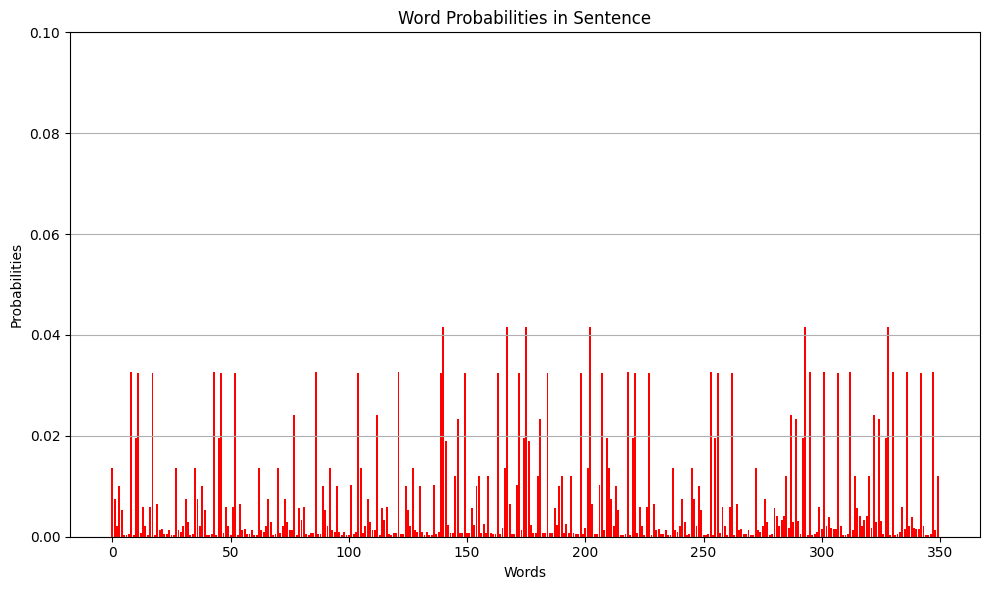

In [245]:
plt.figure(figsize=(10, 6))
plt.bar(word_array, probability_array1, color='red')
plt.xlabel('Words')
plt.ylabel('Probabilities')
plt.title('Word Probabilities in Sentence')
plt.ylim(0, 0.1)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

## 5. Saving the model

In [246]:
!pip freeze > requirements.txt

In [248]:
with open('bayesian_data.json', 'w') as json_file:
    json.dump(conditional_probs, json_file)